In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

In [26]:
df = pd.read_csv("NEW-DATA-3.T15.txt", sep=' ')

In [27]:
print(df.dtypes)

1:Date                              object
2:Time                              object
3:Temperature_Comedor_Sensor       float64
4:Temperature_Habitacion_Sensor    float64
5:Weather_Temperature              float64
6:CO2_Comedor_Sensor               float64
7:CO2_Habitacion_Sensor            float64
8:Humedad_Comedor_Sensor           float64
9:Humedad_Habitacion_Sensor        float64
10:Lighting_Comedor_Sensor         float64
11:Lighting_Habitacion_Sensor      float64
12:Precipitacion                   float64
13:Meteo_Exterior_Crepusculo       float64
14:Meteo_Exterior_Viento           float64
15:Meteo_Exterior_Sol_Oest         float64
16:Meteo_Exterior_Sol_Est          float64
17:Meteo_Exterior_Sol_Sud          float64
18:Meteo_Exterior_Piranometro      float64
19:Exterior_Entalpic_1               int64
20:Exterior_Entalpic_2               int64
21:Exterior_Entalpic_turbo           int64
22:Temperature_Exterior_Sensor     float64
23:Humedad_Exterior_Sensor         float64
24:Day_Of_W

In [28]:
df=df.rename(columns={"1:Date":"Date",
                      "2:Time":"Time",
                      "3:Temperature_Comedor_Sensor":"3:Temperature_Dinning_Sensor",
                   "4:Temperature_Habitacion_Sensor": "4:Temperature_Room_Sensor",
                  "6:CO2_Comedor_Sensor": "6:CO2_Dinning_Sensor",
                  "7:CO2_Habitacion_Sensor":"7:CO2_Room_Sensor",
                  "8:Humedad_Comedor_Sensor":"8:Humid_Dinning_Sensor",
                  "9:Humedad_Habitacion_Sensor":"9:Humid_Room_Sensor",
                  "10:Lighting_Comedor_Sensor":"10:Lighting_Dinning_Sensor",
                  "11:Lighting_Habitacion_Sensor":"11:Lighting_Room_Sensor",
                  "13:Meteo_Exterior_Crepusculo":"13:Sun_Dusk",
                  "14:Meteo_Exterior_Viento":"14:Win",
                  "15:Meteo_Exterior_Sol_Oest":"15:Sunlight_West",
                  "16:Meteo_Exterior_Sol_Est":"16:Sunlight_East",
                   "17:Meteo_Exterior_Sol_Sud":"17:Sunlight_South",
                   "18:Meteo_Exterior_Piranometro":"18:Sun_Irradiance",
                "23:Humedad_Exterior_Sensor":"23:Humid_Exterior_Sensor"})

In [29]:
df

,Date,Time,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,6:CO2_Dinning_Sensor,7:CO2_Room_Sensor,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,...,15:Sunlight_West,16:Sunlight_East,17:Sunlight_South,18:Sun_Irradiance,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,24:Day_Of_Week
0,18/04/2012,00:00,20.2000,19.8000,13.0000,207.840,206.560,31.5800,30.1600,11.7200,...,0.00,0.00,0.000,-3.12000,0,0,0,16.0700,39.0800,3.0
1,18/04/2012,00:15,20.1593,19.7600,13.0000,207.499,206.101,31.6240,30.0613,11.5240,...,0.00,0.00,0.000,-2.80800,0,0,0,16.0400,38.9680,3.0
2,18/04/2012,00:30,20.0740,19.6580,13.0000,207.360,206.805,31.6507,30.1773,11.6220,...,0.00,0.00,0.000,-2.96400,0,0,0,16.0160,38.9467,3.0
3,18/04/2012,00:45,19.9773,19.5833,13.0000,207.445,206.325,31.6987,30.2560,11.7847,...,0.00,0.00,0.000,-3.02933,0,0,0,15.9427,39.0760,3.0
4,18/04/2012,01:00,19.8933,19.5000,13.0000,207.840,205.952,31.7707,30.3840,11.5887,...,0.00,0.00,0.000,-2.88600,0,0,0,15.8627,40.0413,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.00,0.00,0.000,-3.43400,0,0,0,16.6180,49.2960,3.0
4133,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,465.92,2716.67,523.264,3.85200,0,0,0,16.4013,50.0373,3.0
4134,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3454.98,16203.80,3347.460,26.83000,0,0,0,16.2607,50.0587,3.0
4135,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,6795.26,38303.10,7110.660,66.94930,0,0,0,16.2367,49.8400,3.0


In [30]:
df['Year']=[d.split('/')[2] for d in df.Date]
df['Month']=[d.split('/')[1] for d in df.Date]
df['Day']=[d.split('/')[0] for d in df.Date]
df['Hour']=[d.split(':')[0] for d in df.Time]
df['Minutes']=[d.split(':')[1] for d in df.Time]

In [7]:
df #All new columns are added to the end of the dataframe

,Date,Time,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,6:CO2_Dinning_Sensor,7:CO2_Room_Sensor,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,...,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,24:Day_Of_Week,Year,Month,Day,Hour,Minutes
0,18/04/2012,00:00,20.2000,19.8000,13.0000,207.840,206.560,31.5800,30.1600,11.7200,...,0,0,16.0700,39.0800,3.0,2012,04,18,00,00
1,18/04/2012,00:15,20.1593,19.7600,13.0000,207.499,206.101,31.6240,30.0613,11.5240,...,0,0,16.0400,38.9680,3.0,2012,04,18,00,15
2,18/04/2012,00:30,20.0740,19.6580,13.0000,207.360,206.805,31.6507,30.1773,11.6220,...,0,0,16.0160,38.9467,3.0,2012,04,18,00,30
3,18/04/2012,00:45,19.9773,19.5833,13.0000,207.445,206.325,31.6987,30.2560,11.7847,...,0,0,15.9427,39.0760,3.0,2012,04,18,00,45
4,18/04/2012,01:00,19.8933,19.5000,13.0000,207.840,205.952,31.7707,30.3840,11.5887,...,0,0,15.8627,40.0413,3.0,2012,04,18,01,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0,0,16.6180,49.2960,3.0,2012,04,11,05,30
4133,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,0,0,16.4013,50.0373,3.0,2012,04,11,05,45
4134,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,0,0,16.2607,50.0587,3.0,2012,04,11,06,00
4135,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,0,0,16.2367,49.8400,3.0,2012,04,11,06,15


In [31]:
target = df['5:Weather_Temperature']
x = df.drop(['Date','Time','6:CO2_Dinning_Sensor','7:CO2_Room_Sensor','12:Precipitacion','15:Sunlight_West',
             '16:Sunlight_East','19:Exterior_Entalpic_1','20:Exterior_Entalpic_2','21:Exterior_Entalpic_turbo','24:Day_Of_Week'], axis=1)
x.head()

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,13:Sun_Dusk,14:Win,17:Sunlight_South,18:Sun_Irradiance,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,Year,Month,Day,Hour,Minutes
0,20.2000,19.8000,13.0,31.5800,30.1600,11.7200,14.1600,0.65,0.000000,0.0,-3.12000,16.0700,39.0800,2012,04,18,00,00
1,20.1593,19.7600,13.0,31.6240,30.0613,11.5240,14.7600,0.65,0.000000,0.0,-2.80800,16.0400,38.9680,2012,04,18,00,15
2,20.0740,19.6580,13.0,31.6507,30.1773,11.6220,14.9547,0.65,0.088000,0.0,-2.96400,16.0160,38.9467,2012,04,18,00,30
3,19.9773,19.5833,13.0,31.6987,30.2560,11.7847,15.0520,0.65,0.127333,0.0,-3.02933,15.9427,39.0760,2012,04,18,00,45
4,19.8933,19.5000,13.0,31.7707,30.3840,11.5887,15.2147,0.65,0.000000,0.0,-2.88600,15.8627,40.0413,2012,04,18,01,00


In [32]:
#Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)#Normalising data
data_trans = scaler.transform(x)#Filling in the dataframe
final_df= pd.DataFrame(data_trans,columns=x.columns)#constructing a data frame

In [33]:
final_df.head()

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,5:Weather_Temperature,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,13:Sun_Dusk,14:Win,17:Sunlight_South,18:Sun_Irradiance,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor,Year,Month,Day,Hour,Minutes
0,0.503528,0.499313,0.448276,0.155436,0.082176,0.009697,0.018676,0.000069,0.000000,0.0,0.000951,0.331002,0.273452,0.0,0.5,0.566667,0.000000,0.000000
1,0.501212,0.497024,0.448276,0.156701,0.079383,0.007758,0.022633,0.000069,0.000000,0.0,0.001235,0.329552,0.271632,0.0,0.5,0.566667,0.000000,0.333333
2,0.496358,0.491186,0.448276,0.157469,0.082666,0.008728,0.023917,0.000069,0.013921,0.0,0.001093,0.328392,0.271286,0.0,0.5,0.566667,0.000000,0.666667
3,0.490855,0.486910,0.448276,0.158849,0.084893,0.010338,0.024559,0.000069,0.020143,0.0,0.001033,0.324848,0.273387,0.0,0.5,0.566667,0.000000,1.000000
4,0.486074,0.482143,0.448276,0.160919,0.088515,0.008398,0.025632,0.000069,0.000000,0.0,0.001164,0.320980,0.289068,0.0,0.5,0.566667,0.043478,0.000000


# Train and Test Split

In [11]:
X = final_df.drop('5:Weather_Temperature',axis=1)
y = df['5:Weather_Temperature']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#y_Test=y_Test.tolist()

#type(y_Test)


(2895, 17)
(1242, 17)
(2895,)
(1242,)


# Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train,y_train)
y_pred= linearRegressor.predict(X_test)
#np.mean(y_Prediction_Test)    
from sklearn.metrics import mean_squared_error
print("Mean squared error for linear regression model: %.2f" % mean_squared_error(y_test,y_pred))
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for linear regression model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for linear regression model")
print(scorr)

Mean squared error for linear regression model: 3.05
Pearson Correlation for linear regression model
0.9168792800266954
Spearman Correlation for linear regression model
0.9194019822745941


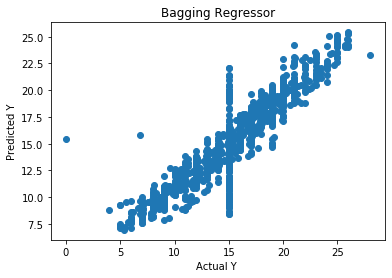

In [14]:
plt.scatter(y_test,y_pred)
plt.title('Bagging Regressor')
plt.xlabel('Actual Y ')
plt.ylabel('Predicted Y')
plt.show()

# SVM model

In [15]:
from sklearn.svm import SVR
SVM_regressor = SVR(kernel='rbf')
SVM_regressor.fit(X_train, y_train)
y_pred=SVM_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error

correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for SVM model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for SVM model")
print(scorr)
print("Mean squared error for SVM model: %.2f" % mean_squared_error(y_test,y_pred))

Pearson Correlation for SVM model
0.9254088053348711
Spearman Correlation for SVM model
0.929470600795464
Mean squared error for SVM model: 2.77


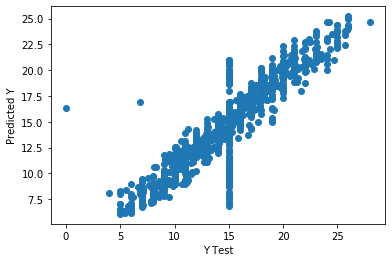

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Decision Tree Regression Model

In [17]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for DecisionTree model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for DecisionTree model")
print(scorr)
print("Mean squared error for DecisionTree model: %.2f" % mean_squared_error(y_test,y_pred))

Pearson Correlation for DecisionTree model
0.9666035610418222
Spearman Correlation for DecisionTree model
0.9700404333220496
Mean squared error for DecisionTree model: 1.27


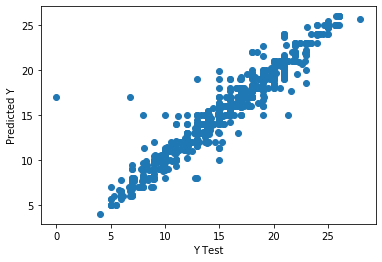

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# KNN Regression Model

RMSE value for k=  1 is: 1.699641269246095
RMSE value for k=  2 is: 1.5166404730814909
RMSE value for k=  3 is: 1.466147528318252
RMSE value for k=  4 is: 1.493805322776876
RMSE value for k=  5 is: 1.520592564090306
RMSE value for k=  6 is: 1.5255068493103934
RMSE value for k=  7 is: 1.564997059294282
RMSE value for k=  8 is: 1.5991388752738418
RMSE value for k=  9 is: 1.6181309860781845
RMSE value for k=  10 is: 1.6387975813884799
RMSE value for k=  11 is: 1.6617541834770067
RMSE value for k=  12 is: 1.6831536055060317
RMSE value for k=  13 is: 1.6976429722626571
RMSE value for k=  14 is: 1.712206080410799
RMSE value for k=  15 is: 1.7370528568318155
RMSE value for k=  16 is: 1.7513174238061269
RMSE value for k=  17 is: 1.7624591951247195
RMSE value for k=  18 is: 1.7771212445896627
RMSE value for k=  19 is: 1.7930729352526895
RMSE value for k=  20 is: 1.8040672277048846


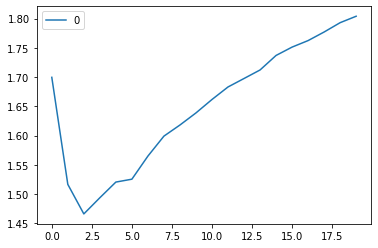

In [19]:
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [20]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for KNN model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for KNN model")
print(scorr)
print("Mean squared error for KNN model: %.2f" % mean_squared_error(y_test,y_pred))

Pearson Correlation for KNN model
0.9422962993429271
Spearman Correlation for KNN model
0.9484289275236495
Mean squared error for KNN model: 2.15


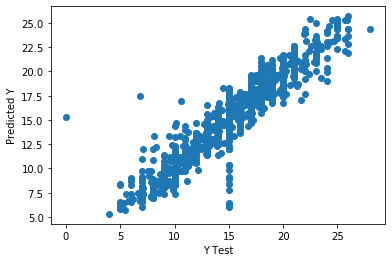

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Boosting Regression Model

In [22]:
from sklearn import ensemble
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}
model=ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for Boosting Regression model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for Boosting Regression model")
print(scorr)
print("Mean squared error for Boosting Regression model: %.2f" % mean_squared_error(y_test,y_pred))

Pearson Correlation for Boosting Regression model
0.9698587789804419
Spearman Correlation for Boosting Regression model
0.9688613232469079
Mean squared error for Boosting Regression model: 1.15


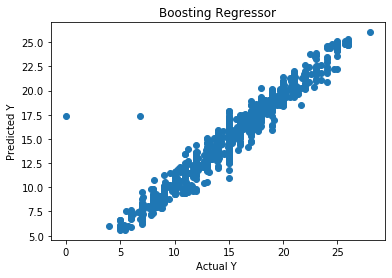

In [23]:
plt.scatter(y_test,y_pred)
plt.title('Boosting Regressor')
plt.xlabel('Actual Y ')
plt.ylabel('Predicted Y')
plt.show()

# Bagging Regression Model

In [42]:
model=ensemble.BaggingRegressor(n_estimators=10,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
correlation, p_value = stats.pearsonr(y_test,y_pred)
print("Pearson Correlation for Bagging Regression model")
print(correlation)
scorr, p = stats.spearmanr(y_test,y_pred)
print("Spearman Correlation for Bagging Regression model")
print(scorr)
print("Mean squared error for Bagging Regression model: %.2f" % mean_squared_error(y_test,y_pred))

Pearson Correlation for Bagging Regression model
0.9829560540290604
Spearman Correlation for Bagging Regression model
0.9782345758351673
Mean squared error for Bagging Regression model: 0.62


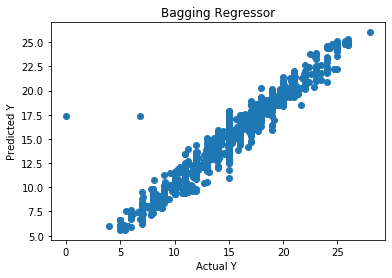

In [24]:
plt.scatter(y_test,y_pred)
plt.title('Bagging Regressor')
plt.xlabel('Actual Y ')
plt.ylabel('Predicted Y')
plt.show()

# Sequential Deep Learning Regression Model

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(40, input_dim=17, activation='relu'))
model.add(Dense(20, input_dim=17, activation='relu'))
model.add(Dense(1, activation='linear'))

Using TensorFlow backend.
C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kanka\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kanka\Anaconda3\envs\keras\lib\site-pa

Instructions for updating:
Colocations handled automatically by placer.


In [35]:
model.compile(loss='mse', optimizer= 'adam', metrics=['mse','mae'])
neural_train=model.fit(X_train, y_train, batch_size=15, epochs= 200, verbose=1)
print(model.summary())

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
2895/2895 [==============================] - 0s 141us/step - loss: 72.5684 - mean_squared_error: 72.5684 - mean_absolute_error: 6.4638
Epoch 2/200
2895/2895 [==============================] - 0s 43us/step - loss: 6.2965 - mean_squared_error: 6.2965 - mean_absolute_error: 1.9465
Epoch 3/200
2895/2895 [==============================] - 0s 43us/step - loss: 4.4974 - mean_squared_error: 4.4974 - mean_absolute_error: 1.6331
Epoch 4/200
2895/2895 [==============================] - 0s 43us/step - loss: 4.0464 - mean_squared_error: 4.0464 - mean_absolute_error: 1.5325
Epoch 5/200
2895/2895 [==============================] - 0s 45us/step - loss: 3.7841 - mean_squared_error: 3.7841 - mean_absolute_error: 1.4621
Epoch 6/200
2895/2895 [==============================] - 0s 46us/step - loss: 3.5729 - mean_squared_error: 3.5729 - mean_absolute_error: 1.4071
Epoch 7/200
2895/2895 [==============================] - 0s 49us/step - loss: 3.4310 

2895/2895 [==============================] - 0s 39us/step - loss: 1.9253 - mean_squared_error: 1.9253 - mean_absolute_error: 0.9670
Epoch 56/200
2895/2895 [==============================] - 0s 39us/step - loss: 1.8888 - mean_squared_error: 1.8888 - mean_absolute_error: 0.9540
Epoch 57/200
2895/2895 [==============================] - 0s 40us/step - loss: 1.9108 - mean_squared_error: 1.9108 - mean_absolute_error: 0.9616
Epoch 58/200
2895/2895 [==============================] - 0s 38us/step - loss: 1.8536 - mean_squared_error: 1.8536 - mean_absolute_error: 0.9415
Epoch 59/200
2895/2895 [==============================] - 0s 43us/step - loss: 1.8484 - mean_squared_error: 1.8484 - mean_absolute_error: 0.9426
Epoch 60/200
2895/2895 [==============================] - 0s 50us/step - loss: 1.8583 - mean_squared_error: 1.8583 - mean_absolute_error: 0.9449
Epoch 61/200
2895/2895 [==============================] - 0s 50us/step - loss: 1.8198 - mean_squared_error: 1.8198 - mean_absolute_error: 0.938

2895/2895 [==============================] - 0s 38us/step - loss: 1.4567 - mean_squared_error: 1.4567 - mean_absolute_error: 0.8415
Epoch 112/200
2895/2895 [==============================] - 0s 38us/step - loss: 1.4880 - mean_squared_error: 1.4880 - mean_absolute_error: 0.8615
Epoch 113/200
2895/2895 [==============================] - 0s 38us/step - loss: 1.4721 - mean_squared_error: 1.4721 - mean_absolute_error: 0.8496
Epoch 114/200
2895/2895 [==============================] - 0s 38us/step - loss: 1.4369 - mean_squared_error: 1.4369 - mean_absolute_error: 0.8411
Epoch 115/200
2895/2895 [==============================] - 0s 38us/step - loss: 1.4578 - mean_squared_error: 1.4578 - mean_absolute_error: 0.8492
Epoch 116/200
2895/2895 [==============================] - 0s 39us/step - loss: 1.4195 - mean_squared_error: 1.4195 - mean_absolute_error: 0.8340
Epoch 117/200
2895/2895 [==============================] - 0s 40us/step - loss: 1.4367 - mean_squared_error: 1.4367 - mean_absolute_error:

2895/2895 [==============================] - 0s 51us/step - loss: 1.2328 - mean_squared_error: 1.2328 - mean_absolute_error: 0.7765
Epoch 167/200
2895/2895 [==============================] - 0s 48us/step - loss: 1.2198 - mean_squared_error: 1.2198 - mean_absolute_error: 0.7657
Epoch 168/200
2895/2895 [==============================] - 0s 55us/step - loss: 1.2500 - mean_squared_error: 1.2500 - mean_absolute_error: 0.7894
Epoch 169/200
2895/2895 [==============================] - 0s 52us/step - loss: 1.2281 - mean_squared_error: 1.2281 - mean_absolute_error: 0.7801
Epoch 170/200
2895/2895 [==============================] - 0s 51us/step - loss: 1.2543 - mean_squared_error: 1.2543 - mean_absolute_error: 0.7884
Epoch 171/200
2895/2895 [==============================] - 0s 51us/step - loss: 1.2509 - mean_squared_error: 1.2509 - mean_absolute_error: 0.7924
Epoch 172/200
2895/2895 [==============================] - 0s 56us/step - loss: 1.2139 - mean_squared_error: 1.2139 - mean_absolute_error:

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error'])


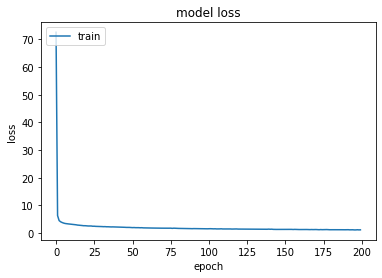

In [36]:
print(neural_train.history.keys())
# "Loss"
plt.plot(neural_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
pred= model.predict(X_test)
y_pred=[]
for i in range(0,1242):   
    arrtolist=pred[i].tolist()    
    y_pred.append(arrtolist[0])

In [38]:
y_Test = y_test.tolist()

In [39]:
correlation, p_value = stats.pearsonr(y_Test, y_pred)
print("Pearson Correlation for Sequential Deep Learning model")
print(correlation)
scorr, p = stats.spearmanr(y_Test, y_pred)
print("Spearman Correlation for Sequential Deep Learning model")
print(scorr)
print("Mean Squared Error for the Sequential Deep Learning Model")
print(np.sqrt(mean_squared_error(y_Test,y_pred))) 

Pearson Correlation for Sequential Deep Learning model
0.9689966807581316
Spearman Correlation for Sequential Deep Learning model
0.967454922314098
Mean Squared Error for the Sequential Deep Learning Model
1.0910330264623516


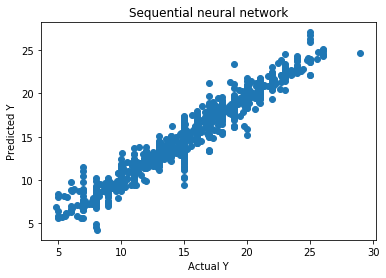

In [41]:
plt.scatter(y_Test,y_pred)
plt.title("Sequential neural network")
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.show()

# LSTM Deep Learning Regression Model

In [33]:
print(X_train.shape); print(X_test.shape)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2895, 17)
(1242, 17)
(2895, 1, 17) (2895,) (1242, 1, 17) (1242,)


In [34]:
# Define model
from keras.layers import Dropout
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(50,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=300, batch_size=15, validation_data=(X_test, y_test), verbose=2, shuffle=False)
print(model.summary())

Train on 2895 samples, validate on 1242 samples
Epoch 1/300
 - 1s - loss: 149.3491 - val_loss: 22.2138
Epoch 2/300
 - 0s - loss: 14.8577 - val_loss: 10.2503
Epoch 3/300
 - 0s - loss: 9.3712 - val_loss: 7.4624
Epoch 4/300
 - 0s - loss: 7.1812 - val_loss: 5.9381
Epoch 5/300
 - 0s - loss: 5.8571 - val_loss: 4.9876
Epoch 6/300
 - 0s - loss: 5.1095 - val_loss: 4.4399
Epoch 7/300
 - 0s - loss: 4.6079 - val_loss: 4.0341
Epoch 8/300
 - 0s - loss: 4.2286 - val_loss: 3.7295
Epoch 9/300
 - 0s - loss: 3.9390 - val_loss: 3.5084
Epoch 10/300
 - 0s - loss: 3.7293 - val_loss: 3.3542
Epoch 11/300
 - 0s - loss: 3.5798 - val_loss: 3.2504
Epoch 12/300
 - 0s - loss: 3.4740 - val_loss: 3.1774
Epoch 13/300
 - 0s - loss: 3.3937 - val_loss: 3.1194
Epoch 14/300
 - 0s - loss: 3.3245 - val_loss: 3.0598
Epoch 15/300
 - 0s - loss: 3.2559 - val_loss: 3.0031
Epoch 16/300
 - 0s - loss: 3.1907 - val_loss: 2.9511
Epoch 17/300
 - 0s - loss: 3.1320 - val_loss: 2.9022
Epoch 18/300
 - 0s - loss: 3.0763 - val_loss: 2.8574
Ep

Epoch 154/300
 - 0s - loss: 1.4949 - val_loss: 1.4224
Epoch 155/300
 - 0s - loss: 1.4923 - val_loss: 1.4195
Epoch 156/300
 - 0s - loss: 1.4896 - val_loss: 1.4176
Epoch 157/300
 - 0s - loss: 1.4868 - val_loss: 1.4150
Epoch 158/300
 - 0s - loss: 1.4841 - val_loss: 1.4127
Epoch 159/300
 - 0s - loss: 1.4810 - val_loss: 1.4097
Epoch 160/300
 - 0s - loss: 1.4785 - val_loss: 1.4078
Epoch 161/300
 - 0s - loss: 1.4759 - val_loss: 1.4045
Epoch 162/300
 - 0s - loss: 1.4733 - val_loss: 1.4022
Epoch 163/300
 - 0s - loss: 1.4708 - val_loss: 1.4004
Epoch 164/300
 - 0s - loss: 1.4681 - val_loss: 1.3970
Epoch 165/300
 - 0s - loss: 1.4653 - val_loss: 1.3964
Epoch 166/300
 - 0s - loss: 1.4630 - val_loss: 1.3927
Epoch 167/300
 - 0s - loss: 1.4605 - val_loss: 1.3907
Epoch 168/300
 - 1s - loss: 1.4582 - val_loss: 1.3878
Epoch 169/300
 - 1s - loss: 1.4554 - val_loss: 1.3859
Epoch 170/300
 - 1s - loss: 1.4529 - val_loss: 1.3820
Epoch 171/300
 - 1s - loss: 1.4502 - val_loss: 1.3798
Epoch 172/300
 - 1s - loss: 

In [35]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

TypeError: 'History' object is not subscriptable

In [ ]:
pred = model.predict(X_test)

In [ ]:
y_pred=[]
for i in range(0,1242):   
    arrtolist=pred[i].tolist()    
    y_pred.append(arrtolist[0])
y_Test = y_test.tolist()

In [ ]:
correlation, p_value = stats.pearsonr(y_Test, y_pred)
print("Pearson Correlation for LSTM Deep Learning model")
print(correlation)
scorr, p = stats.spearmanr(y_Test, y_pred)
print("Spearman Correlation for LSTM Deep Learning model")
print(scorr)
print("Mean Squared Error for the LSTM Deep Learning Model")
print(np.sqrt(mean_squared_error(y_Test,y_pred))) 

In [ ]:
plt.scatter(y_Test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()